In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

df_data = pd.read_csv('./al_data.csv')

# ISO 코드(b_iso)를 기준으로 국가별 정보를 합산
df_sum = df_data.groupby('b_iso').sum()

# ISO 코드를 기반으로 유사한 국가를 추천하는 함수 정의
def recommend_similar_countries(target_iso, top_n=3):
    # 해당 ISO 코드의 인덱스 가져오기
    index = df_sum.index.get_loc(target_iso)
    
    # 해당 ISO 코드와 다른 국가들 간의 코사인 유사도 계산
    similarities = cosine_similarity(df_sum.values[index:index+1], df_sum.values)[0]
    
    # 유사도가 높은 순서로 정렬하여 top_n개의 인덱스 추출 (자기 자신은 제외)
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]
    
    # 추천할 국가들의 ISO 코드 반환
    recommended_countries = df_sum.iloc[similar_indices].index.tolist()
    
    return recommended_countries

target_iso = 'NL'
recommended_countries = recommend_similar_countries(target_iso, top_n=3)

print(f"{target_iso}를 기준으로 유사한 국가 추천:", recommended_countries)


NL를 기준으로 유사한 국가 추천: ['IE', 'MT', 'MX']


In [12]:
import pandas as pd

# cp949 인코딩으로 파일 읽기
df = pd.read_csv("countries.csv", encoding='cp949')

# utf-8 인코딩으로 파일 저장
df.to_csv("countries_utf8.csv", encoding='utf-8', index=False)


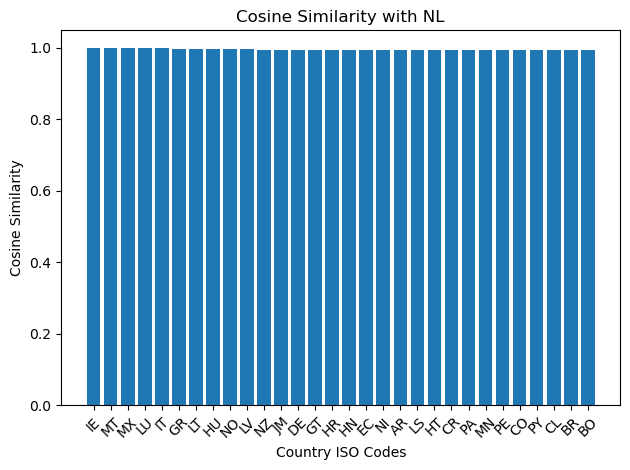

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# 데이터 로드
df_data = pd.read_csv('./al_data.csv')

# ISO 코드(b_iso)를 기준으로 국가별 정보를 합산
df_sum = df_data.groupby('b_iso').sum()

# ISO 코드를 기반으로 유사한 국가를 추천하는 함수 정의
def recommend_similar_countries(target_iso, top_n=3):
    # 해당 ISO 코드의 인덱스 가져오기
    index = df_sum.index.get_loc(target_iso)
    
    # 해당 ISO 코드와 다른 국가들 간의 코사인 유사도 계산
    similarities = cosine_similarity(df_sum.values[index:index+1], df_sum.values)[0]
    
    # 유사도가 높은 순서로 정렬하여 top_n개의 인덱스 추출 (자기 자신은 제외)
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]
    
    # 추천할 국가들의 ISO 코드와 유사도 반환
    recommended_countries = df_sum.iloc[similar_indices].index.tolist()
    similarity_scores = similarities[similar_indices]
    
    return recommended_countries, similarity_scores

# 코사인 유사도 시각화 함수 정의
def plot_similarity(target_iso, recommended_countries, similarity_scores):
    fig, ax = plt.subplots()
    ax.bar(recommended_countries, similarity_scores, align='center')
    ax.set_xlabel('Country ISO Codes')
    ax.set_ylabel('Cosine Similarity')
    ax.set_title(f'Cosine Similarity with {target_iso}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 테스트할 ISO 코드와 유사한 국가들 추출
target_iso = 'NL'  # 네덜란드를 예시로 설정
recommended_countries, similarity_scores = recommend_similar_countries(target_iso, top_n=30)

# 추천된 국가들과의 코사인 유사도 시각화
plot_similarity(target_iso, recommended_countries, similarity_scores)
